In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pims

import dask
import dask.array as da
import tifffile as tf
from nd2reader import ND2Reader
# from pims import ND2_Reader as ND2Reader
# import aicsimageio.vendor.omexml as ome
import glob
import time, sys
sys.path.insert(0,'/home/jmamede/scripts/notebooks/libraries/')
from deco_libraries import Concat_OMEXML,update_progress, pimsmeta2OMEXML, Nd2meta2OMEXML, observer, init_RL_algo, deconv, depth_divide

In [65]:
filelist = glob.glob("/run/media/jmamede/Joao/CAruby/20200626/concat/*_v01*ome.tiff")
filelist.sort()

In [66]:
# filelist
# filelist.pop()
# filelist.reverse()
filelist.reverse()

In [67]:
xml = Concat_OMEXML(filelist.copy(), project = True, verbose = True)

Time total: /run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue_concatenated001_v01_PRJ.ome.tiff
Time total: /run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
Write PlaneTable:  0 0 0 0
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
0
4128.68
No position X
No position Y
Write PlaneTable:  0 0 1 1
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
1
4128.68
No position X
No position Y
Write PlaneTable:  0 0 2 2
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
2
4128.68
No position X
No position Y
Write PlaneTable:  1 0 0 3
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
3
4130.74
No position X
No position Y
Write PlaneTable:  1 0 1 4
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01

/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
48
4123.22
No position X
No position Y
Write PlaneTable:  16 0 1 49
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
49
4123.22
No position X
No position Y
Write PlaneTable:  16 0 2 50
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
50
4123.22
No position X
No position Y
Write PlaneTable:  17 0 0 51
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
51
4123.36
No position X
No position Y
Write PlaneTable:  17 0 1 52
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
52
4123.36
No position X
No position Y
Write PlaneTable:  17 0 2 53
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
53
4123.36
No position X
No position Y
Write PlaneTable:  18

/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
97
4119.22
No position X
No position Y
Write PlaneTable:  32 0 2 98
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
98
4119.22
No position X
No position Y
Write PlaneTable:  33 0 0 99
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
99
4119.14
No position X
No position Y
Write PlaneTable:  33 0 1 100
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
100
4119.14
No position X
No position Y
Write PlaneTable:  33 0 2 101
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
101
4119.14
No position X
No position Y
Write PlaneTable:  34 0 0 102
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
102
4119.08
No position X
No position Y
Write PlaneTabl

/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
146
4117.4800000000005
No position X
No position Y
Write PlaneTable:  49 0 0 147
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
147
4117.46
No position X
No position Y
Write PlaneTable:  49 0 1 148
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
148
4117.46
No position X
No position Y
Write PlaneTable:  49 0 2 149
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
149
4117.46
No position X
No position Y
Write PlaneTable:  50 0 0 150
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
150
4117.46
No position X
No position Y
Write PlaneTable:  50 0 1 151
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
151
4117.46
No position X
No position Y

/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
194
4117.96
No position X
No position Y
Write PlaneTable:  65 0 0 195
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
195
4118.88
No position X
No position Y
Write PlaneTable:  65 0 1 196
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
196
4118.88
No position X
No position Y
Write PlaneTable:  65 0 2 197
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
197
4118.88
No position X
No position Y
Write PlaneTable:  66 0 0 198
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
198
4119.42
No position X
No position Y
Write PlaneTable:  66 0 1 199
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
199
4119.42
No position X
No position Y
Write Plan

/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
242
4122.12
No position X
No position Y
Write PlaneTable:  81 0 0 243
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
243
4122.36
No position X
No position Y
Write PlaneTable:  81 0 1 244
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
244
4122.36
No position X
No position Y
Write PlaneTable:  81 0 2 245
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
245
4122.36
No position X
No position Y
Write PlaneTable:  82 0 0 246
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
246
4122.36
No position X
No position Y
Write PlaneTable:  82 0 1 247
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
247
4122.36
No position X
No position Y
Write Plan

Write PlaneTable:  97 0 0 291
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
291
4122.36
No position X
No position Y
Write PlaneTable:  97 0 1 292
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
292
4122.36
No position X
No position Y
Write PlaneTable:  97 0 2 293
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
293
4122.36
No position X
No position Y
Write PlaneTable:  98 0 0 294
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
294
4122.3
No position X
No position Y
Write PlaneTable:  98 0 1 295
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
295
4122.3
No position X
No position Y
Write PlaneTable:  98 0 2 296
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
296
4122.3
No position

/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
339
4122.46
No position X
No position Y
Write PlaneTable:  113 0 1 340
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
340
4122.46
No position X
No position Y
Write PlaneTable:  113 0 2 341
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
341
4122.46
No position X
No position Y
Write PlaneTable:  114 0 0 342
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
342
4122.46
No position X
No position Y
Write PlaneTable:  114 0 1 343
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
343
4122.46
No position X
No position Y
Write PlaneTable:  114 0 2 344
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
344
4122.46
No position X
No position Y
Write

In [69]:
# filelist = glob.glob("/home/jmamede/Data/test/Concat/*_v01_*ome.tiff")
filelist

['/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue_concatenated001_v01_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff']

In [70]:
for number in range(1,32):
    dire= '/run/media/jmamede/Joao/CAruby/20200626/'
    fname = dire+'igfp1_caruby5_continue_concatenated_v'+str(
            number).zfill(2)+'_PRJ.ome.tiff'
    with tf.TiffWriter(fname, bigtiff=True ,
                               imagej=False) as tif:
        filelist = glob.glob(dire+'concat/*_v'+str(number).zfill(2)+'_*ome.tiff')
        filelist.sort()
        filelist.reverse()
#         filelist.pop()
        first = True
        for ficheiro in filelist:
            print(ficheiro)
            reader = pims.bioformats.BioformatsReader(ficheiro,java_memory='1024m')
            reader.bundle_axes = 'cyx'
            for time in range(reader.sizes['t']):
                if first:
                    tif.save(reader[time].astype(np.uint16)
                        , compress='ZLIB'
                        , description = xml.to_xml()
                        , photometric='minisblack'
                        #, datetime= True
                        , metadata= None
                        , contiguous=False
                        )
                else: 
                    tif.save(reader[time].astype(np.uint16)
                        , compress='ZLIB'
        #                 , description = xml.to_xml()
                        , photometric='minisblack'
                        #, datetime= True
                        , metadata= None
                        , contiguous=False
                        )

/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue_concatenated001_v01_PRJ.ome.tiff
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v01_PRJ.ome.tiff
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue_concatenated001_v02_PRJ.ome.tiff
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v02_PRJ.ome.tiff
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue_concatenated001_v03_PRJ.ome.tiff
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v03_PRJ.ome.tiff
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue_concatenated001_v04_PRJ.ome.tiff
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v04_PRJ.ome.tiff
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue_concatenated001_v05_PRJ.ome.tiff
/run/media/jmamede/Joao/CAruby/20200626/concat/igfp1_caruby5_continue001trigger004_v0

In [21]:
reader = pims.bioformats.BioformatsReader('/home/jmamede/Data/test/Concat/test.ome.tiff',java_memory='1024m')

In [22]:
reader


<FramesSequenceND>
Axes: 4
Axis 'x' size: 2048
Axis 'y' size: 2044
Axis 'c' size: 3
Axis 't' size: 116
Pixel Datatype: <u2

Frame([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)
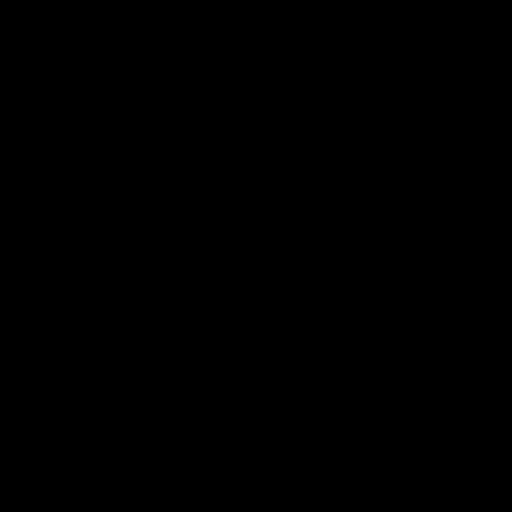

In [57]:
reader.bundle_axes = 'cyx'
reader[25]